<a href="https://colab.research.google.com/github/dexterous27/I-Care/blob/main/I_Care.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
with open('dataset.txt', 'r') as file:
    lines = file.readlines()


In [ ]:
data = []
current_category = ""
for line in lines:
    line = line.strip()
    if line.startswith("Category"):
        current_category = line.replace("Category - ", "")
    elif line.startswith("Question"):
        question = line.replace("Question. ", "")
        data.append({"Category": current_category, "Question": question})
    elif line.startswith("Answer"):
        answer = line.replace("Answer. ", "")
        data[-1]["Answer"] = answer

In [ ]:
df = pd.DataFrame(data)
df

,Category,Question,Answer
0,Mental Health and Well-Being,What kind of facilities does Lambton College i...,Answer: Lambton college in Toronto has an on-c...
1,Mental Health and Well-Being,What to do if you face discrimination of any k...,Answer: Answer: If you face discrimination of ...
2,Mental Health and Well-Being,What are some self-care practices that can hel...,"Answer: Engaging in regular physical exercise,..."
3,Mental Health and Well-Being,How can I manage stress effectively?,Answer: There are various strategies to manage...
4,Mental Health and Well-Being,What can I do if I'm feeling overwhelmed or an...,"Answer: When feeling overwhelmed or anxious, i..."
5,Mental Health and Well-Being,How can I support a friend or loved one who is...,Answer: Supporting someone with mental health ...
6,Mental Health and Well-Being,What are some signs that may indicate the need...,Answer: Signs that may indicate the need to se...
7,Mental Health and Well-Being,How can I promote a positive mental health env...,Answer: You can promote a positive mental heal...
8,Support Questions,What is Co-op?,Answer: Co-op: Cooperative education courses i...
9,Support Questions,Taxes in Canada?,"Answer: In addition to federal income tax, an ..."


In [ ]:
total_questions = len(df)
average_question_length = df['Question'].apply(len).mean()
average_answer_length = df['Answer'].apply(len).mean()

In [ ]:
total_questions, average_answer_length, average_question_length

(40, 263.175, 50.275)

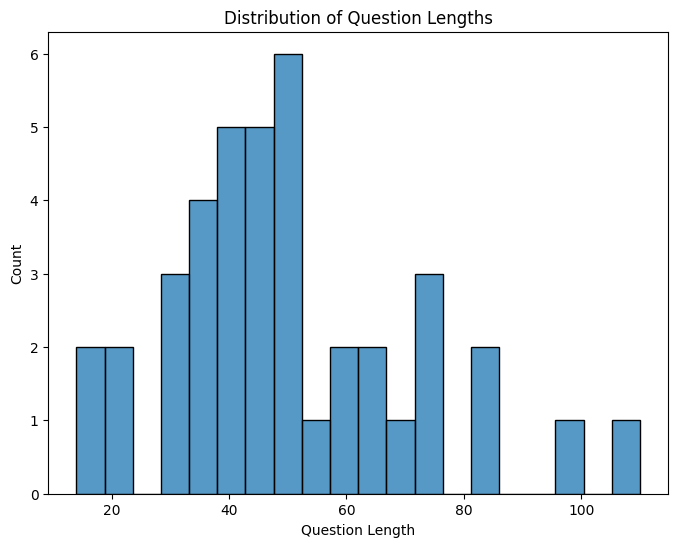

In [ ]:
# Visualize the distribution of question lengths
question_lengths = df['Question'].str.len()
plt.figure(figsize=(8, 6))
sns.histplot(question_lengths, bins=20)
plt.xlabel('Question Length')
plt.ylabel('Count')
plt.title('Distribution of Question Lengths')
plt.show()


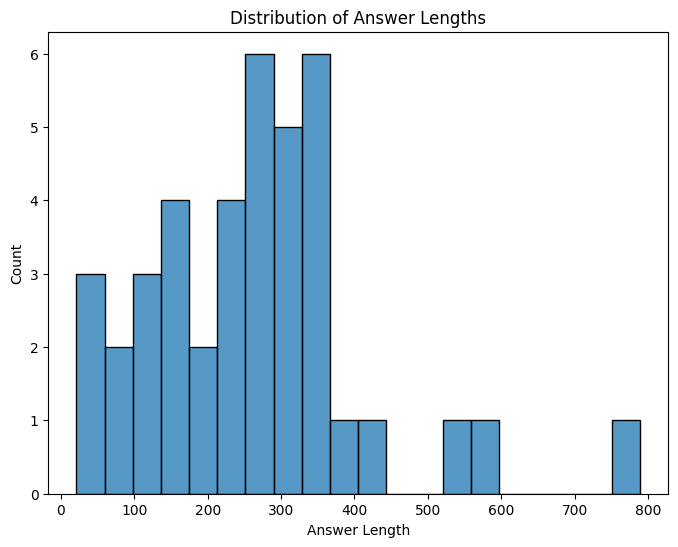

In [ ]:
# Visualize the distribution of answer lengths
answer_lengths = df['Answer'].str.len()
plt.figure(figsize=(8, 6))
sns.histplot(answer_lengths, bins=20)
plt.xlabel('Answer Length')
plt.ylabel('Count')
plt.title('Distribution of Answer Lengths')
plt.show()

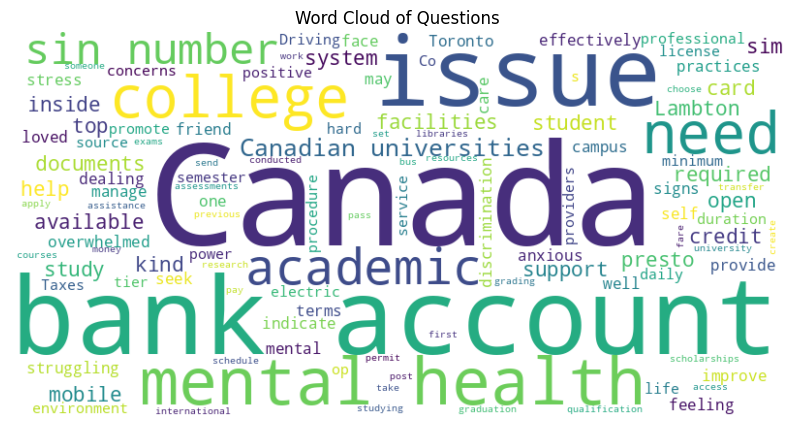

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming df is a pandas DataFrame containing the 'Question' column

# Combine all question texts into a single string
question_text = ' '.join(df['Question'])

# Create a WordCloud object with desired settings
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(question_text)

# Create a figure and plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Questions')
plt.show()

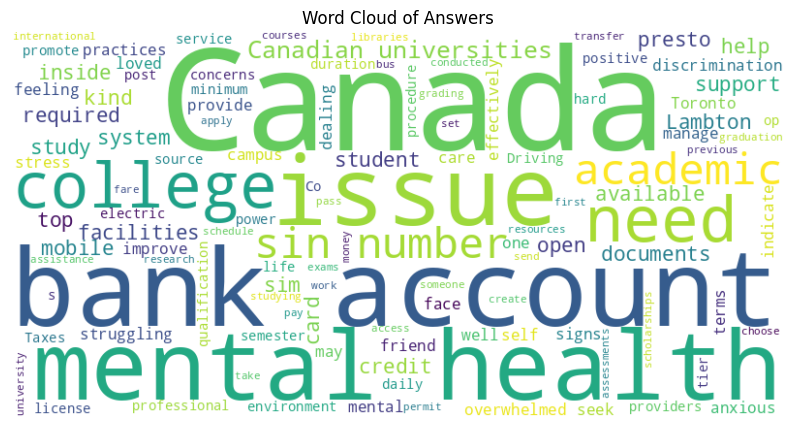

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming df is a pandas DataFrame containing the 'Question' column

# Combine all question texts into a single string
answer_text = ' '.join(df['Answer'])

# Create a WordCloud object with desired settings
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(question_text)

# Create a figure and plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Answers')
plt.show()

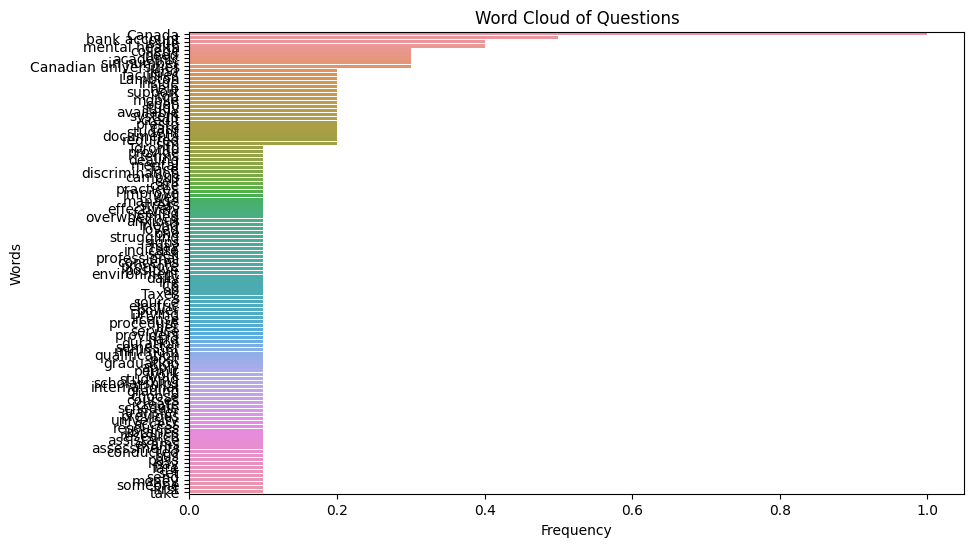

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(question_text)
word_frequencies = wordcloud.words_

# Plot the word cloud using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=list(word_frequencies.values()), y=list(word_frequencies.keys()))
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Word Cloud of Questions')
plt.show()

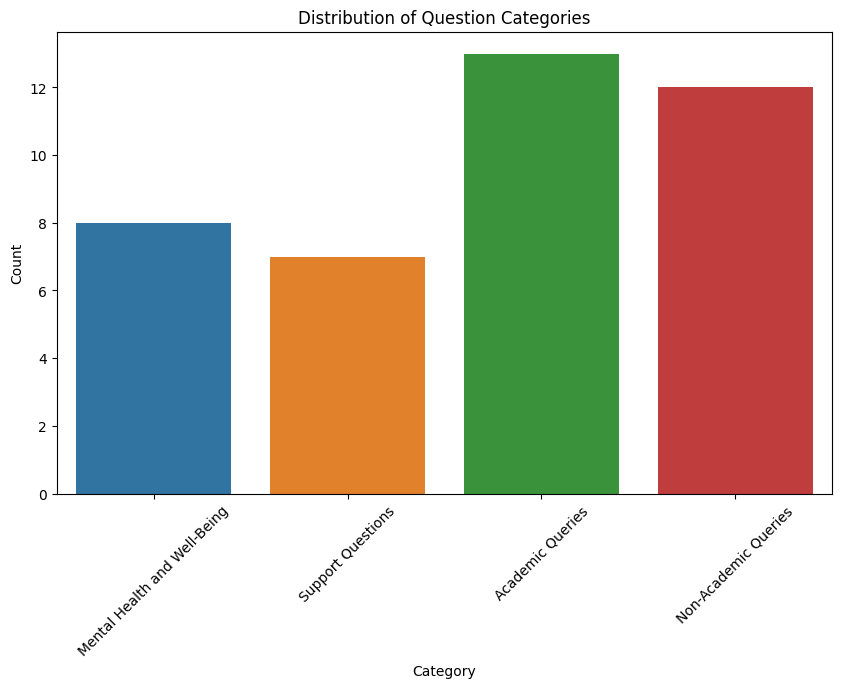

In [ ]:
# Generate a count plot of question categories
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Question Categories')
plt.xticks(rotation=45)
plt.show()

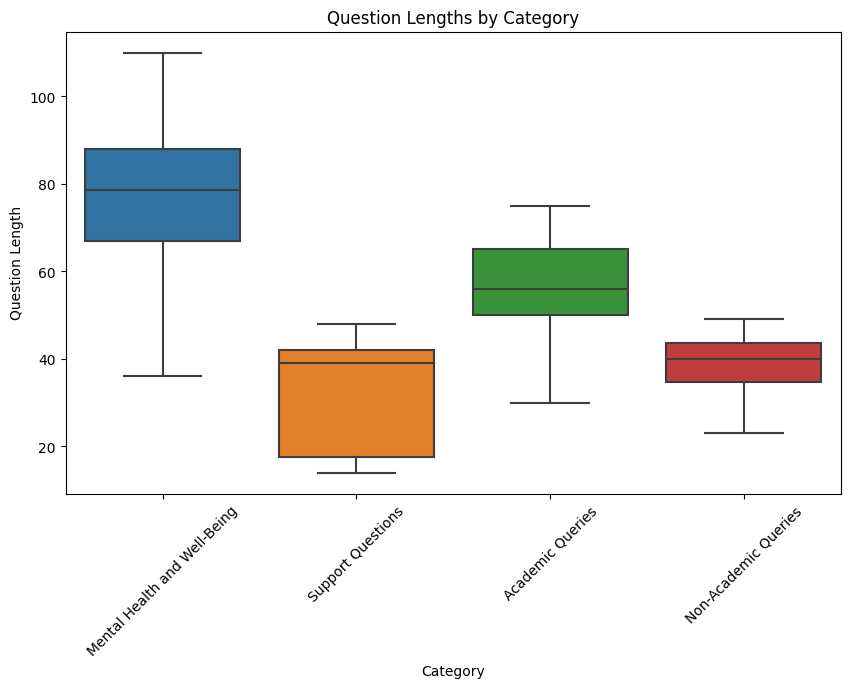

In [ ]:
# Analyze question lengths by category
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Category', y=df['Question'].str.len())
plt.xlabel('Category')
plt.ylabel('Question Length')
plt.title('Question Lengths by Category')
plt.xticks(rotation=45)
plt.show()

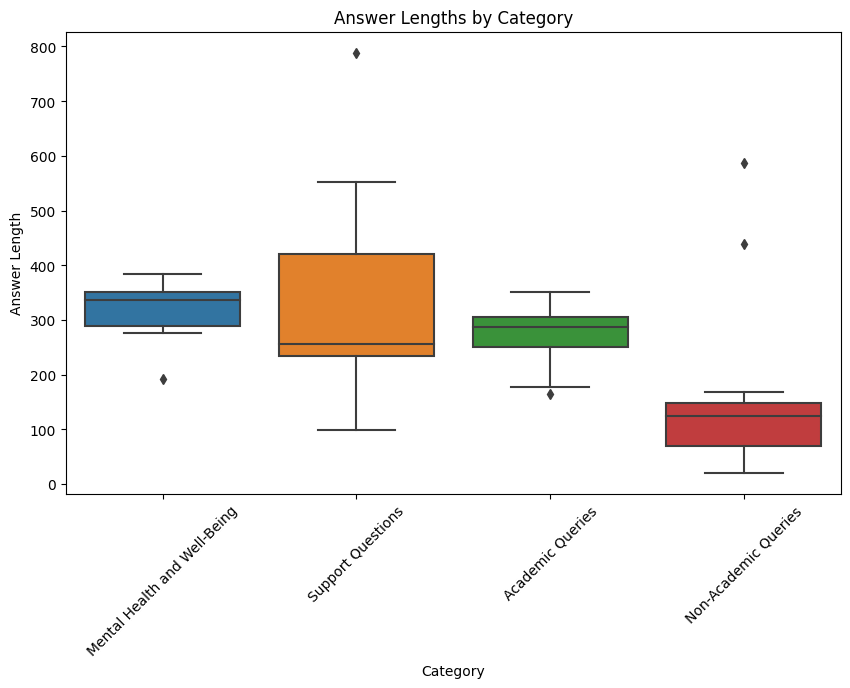

In [ ]:
# Analyze answer lengths by category
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Category', y=df['Answer'].str.len())
plt.xlabel('Category')
plt.ylabel('Answer Length')
plt.title('Answer Lengths by Category')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Print the data summary
print("Total Questions:", total_questions)
print("Average Question Length:", average_question_length)
print("Average Answer Length:", average_answer_length)
print(df.head())

Total Questions: 40
Average Question Length: 50.275
Average Answer Length: 263.175
                       Category  \
0  Mental Health and Well-Being   
1  Mental Health and Well-Being   
2  Mental Health and Well-Being   
3  Mental Health and Well-Being   
4  Mental Health and Well-Being   

                                            Question  \
0  What kind of facilities does Lambton College i...   
1  What to do if you face discrimination of any k...   
2  What are some self-care practices that can hel...   
3               How can I manage stress effectively?   
4  What can I do if I'm feeling overwhelmed or an...   

                                              Answer  
0  Answer: Lambton college in Toronto has an on-c...  
1  Answer: Answer: If you face discrimination of ...  
2  Answer: Engaging in regular physical exercise,...  
3  Answer: There are various strategies to manage...  
4  Answer: When feeling overwhelmed or anxious, i...  
